# importing the required Dependencies

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

# Data Collection and Preprocessing

In [56]:
#loading the dataset from CSV to pandas DataFrames
car_dataset = pd.read_csv(r"E:\TEJU\Dataset\CAR DETAILS FROM CAR DEKHO.csv")

In [57]:
# inspecting the first % rows of the dataframe
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [58]:

# Checking the NO.of rows and Columns
car_dataset.shape

(4340, 8)

In [59]:
# getting some information about the dataframe
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [60]:
#checking the no.of missing values
car_dataset.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [61]:
#checking the distributions for the cateorigal data
print(car_dataset.fuel.value_counts())
print(car_dataset.seller_type.value_counts())
print(car_dataset.transmission.value_counts())
print(car_dataset.owner.value_counts())
print(car_dataset.name.value_counts())
print(car_dataset.year.value_counts())
print(car_dataset.selling_price.value_counts())
print(car_dataset.km_driven.value_counts())

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64
seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64
transmission
Manual       3892
Automatic     448
Name: count, dtype: int64
owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64
name
Maruti Swift Dzire VDI                     69
Maruti Alto 800 LXI                        59
Maruti Alto LXi                            47
Maruti Alto LX                             35
Hyundai EON Era Plus                       35
                                           ..
Hyundai Verna Transform CRDi VGT SX ABS     1
Maruti S-Presso VXI Plus                    1
Toyota Etios Liva 1.2 VX                    1
Toyota Yaris G                              1
Hyundai i20 Magna 1.4 CRDi                  1
Name: co

In [62]:
car_dataset.duplicated().sum()

763

In [63]:

car_dataset = car_dataset.drop_duplicates()

In [64]:
car_dataset.shape

(3577, 8)

In [65]:
car_dataset.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

# ENCODING THE CATEGORICAL DATA

In [66]:
#encoding the "fuel" column
car_dataset.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)

#encoding the "seller_type" column
car_dataset.replace({'seller_type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2}},inplace=True)

#encoding the "transmission" column
car_dataset.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)


car_dataset.replace({'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}},inplace=True)

In [67]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,0,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,0,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,0,0,0
3,Datsun RediGO T Option,2017,250000,46000,0,0,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,0,0,1


In [68]:
car_dataset.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,1,0,0,1
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,1,0,0,1
4337,Maruti 800 AC BSIII,2009,110000,83000,0,0,0,1
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,1,0,0,0
4339,Renault KWID RXT,2016,225000,40000,0,0,0,0


# Splitting the dataset into Taining and Testing data

In [69]:
x = car_dataset.drop(['name','selling_price'],axis=1)
y = car_dataset['selling_price']

In [70]:
x

,year,km_driven,fuel,seller_type,transmission,owner
0,2007,70000,0,0,0,0
1,2007,50000,0,0,0,0
2,2012,100000,1,0,0,0
3,2017,46000,0,0,0,0
4,2014,141000,1,0,0,1
...,...,...,...,...,...,...
4335,2014,80000,1,0,0,1
4336,2014,80000,1,0,0,1
4337,2009,83000,0,0,0,1
4338,2016,90000,1,0,0,0


In [71]:
y

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 3577, dtype: int64

# Splitting Training and Test data

In [72]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.25, random_state = 25)

# Model training

# 1.Linear Regression

In [73]:
lrg = LinearRegression()

In [74]:
lrg.fit(x_train,y_train)

LinearRegression()

# Model Evolution


In [75]:
# prediction on training data
y_pred = lrg.predict(x_train)

In [84]:
# R Squared error
r2_linear =  r2_score(y_train,y_pred)
print("R Squared Error:",r2)

R Squared Error: 0.4133157232874044


In [79]:
mse =  mean_squared_error(y_train,y_pred)
mse

175966916288.68555

In [80]:
mae =  mean_absolute_error(y_train,y_pred) 
mae

219482.98399509376

# Visualize the actual prices and predicted prices

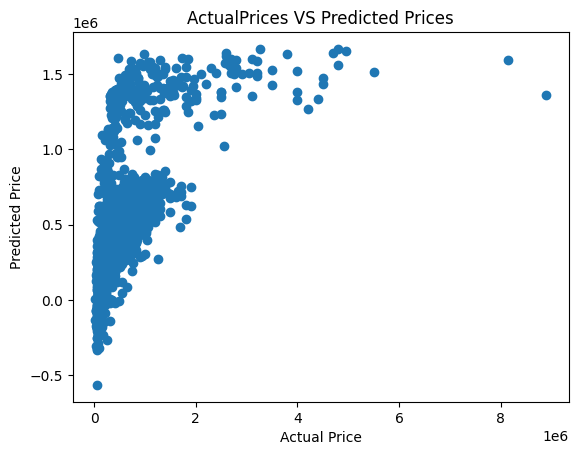

In [32]:
plt.scatter(y_train,y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("ActualPrices VS Predicted Prices")
plt.show()

In [33]:
# prediction on Testing data
test_data_prediction = lrg.predict(x_test)

In [34]:
r2 =  r2_score(y_test,test_data_prediction)
r2

0.391530803726577

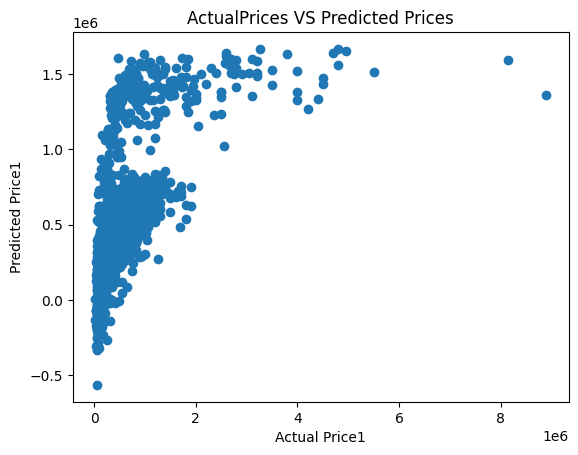

In [35]:
plt.scatter(y_train,y_pred)
plt.xlabel("Actual Price1")
plt.ylabel("Predicted Price1")
plt.title("ActualPrices VS Predicted Prices")
plt.show()

In [36]:
#y_test.shape

In [37]:
#y_pred.shape

# 2) Lasso Regression

In [91]:
las=Lasso()

In [92]:
las.fit(x_train,y_train)

Lasso()

In [93]:
# prediction on training data
y_pred_lasso = las.predict(x_train)

In [94]:
# R Squared error
r2_lasso =  r2_score(y_train,y_pred_lasso)
print("R Squared Error:",r2)

R Squared Error: 0.4133157232874044


In [95]:
mse =  mean_squared_error(y_train,y_pred_lasso)
mse

175966916308.48154

In [96]:
mae =  mean_absolute_error(y_train,y_pred_lasso) 
mae

219482.51942882023

# Visualize the actual prices and predicted prices

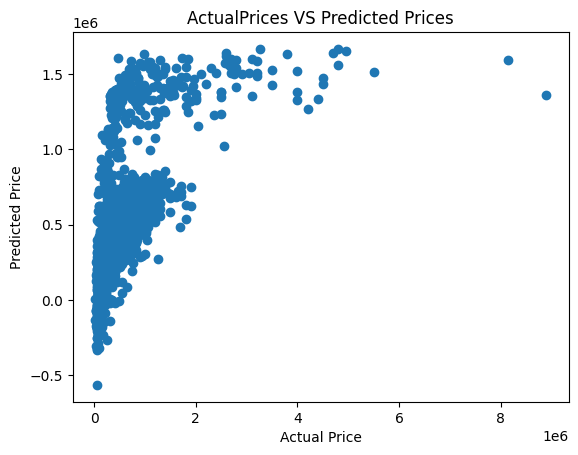

In [97]:
plt.scatter(y_train,y_pred_lasso)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("ActualPrices VS Predicted Prices")
plt.show()

In [98]:
# prediction on Testing data
test_data_prediction_lass = las.predict(x_test)

In [103]:
r2_lasso=  r2_score(y_test,test_data_prediction_lass)
r2_lasso

0.3915348651620829

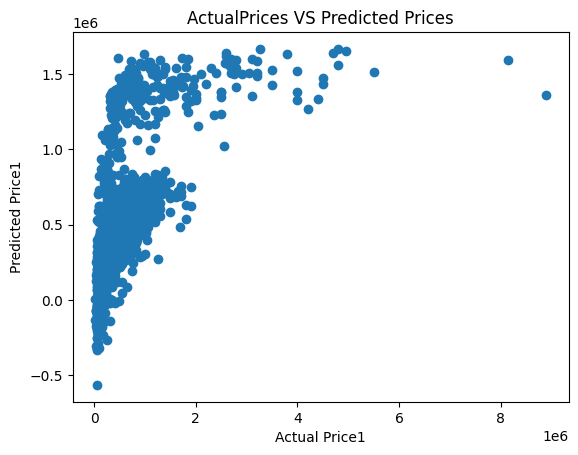

In [100]:
plt.scatter(y_train,y_pred_lasso)
plt.xlabel("Actual Price1")
plt.ylabel("Predicted Price1")
plt.title("ActualPrices VS Predicted Prices")
plt.show()

In [104]:
rr=[{r2_linear},{r2_lasso}]
for i in rr:
    print("R2 Error :",rr)

R2 Error : [{0.4133157232874044}, {0.3915348651620829}]
R2 Error : [{0.4133157232874044}, {0.3915348651620829}]
